# GNOD 1

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# 2. find url and store it in a variable
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
# 3. download html with a get request
response = requests.get(url)
response.status_code

200

In [4]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
# 4.2. check that the html code looks like it should
# soup

In [6]:
# 5. retrieve/extract the desired info (here, you'll paste the "Selector" you copied before to get the element that belongs to the top movie)
soup.select("#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p")

[<p class="title-artist"><cite class="title">Last Night</cite><em class="artist">Morgan Wallen</em></p>]

In [7]:
# soup.select("div.chart-content.col-xs-12.col-sm-8 > p") # all the info about all the songs

In [8]:
# To get the title
soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite")[0].get_text()

'Last Night'

In [9]:
# To get the artist
soup.select("div.chart-content.col-xs-12.col-sm-8 > p > em")[0].get_text()

'Morgan Wallen'

In [10]:
#initialize empty lists
title = []
artist = []


# define the number of iterations of our for loop
# by checking how many elements are in the retrieved result set
# (this is equivalent but more robust than just explicitly defining 250 iterations)
num_iter = len(soup.select("div.chart-content.col-xs-12.col-sm-8 > p"))

tClist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite")
artistlist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > em")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(tClist[i].get_text())
    artist.append(artistlist[i].get_text())

# print(title)
# print(artist)

In [11]:
# each list becomes a column
music = pd.DataFrame({"title":title,
                       "artist":artist
                      })

In [12]:
music

,title,artist
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Fast Car,Luke Combs
3,Thank God I Do,Lauren Daigle
4,FLOWER,JISOO
...,...,...
95,Lavender Haze,Taylor Swift
96,BESO,ROSALÍA & Rauw Alejandro
97,Love Makes You Blind,Kaylee Rose
98,Tennessee Orange,Megan Moroney


# GNOD 2

In [13]:
# 1st question
# artist_name = input (" What´s the singer´s name? ")

In [14]:
# 2nd question
# song_title = input ("What´s the song title? ")

In [15]:
music_title = music.sample(n=1)
# print (pd.Series(music_title['title'].values), pd.Series(music_title['artist'].values)) 

In [16]:
# if len(music[(music['artist'] == artist_name) & (music['title'] == song_title)]) == 1:
#     print (music_title)
# else:
#     print ("Sorry, we don´t have any recommendation for you")

# GNOD 3

In [17]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
import numpy as np

**Storing secrets**

In [18]:
def storing_secrets(password):
    secrets_file = open(password,"r")
    string = secrets_file.read()
    secrets_dict={}
    for line in string.split('\n'):
        if len(line) > 0:
            secrets_dict[line.split(' -> ')[0]]=line.split(' -> ')[1].strip()
    return secrets_dict

In [19]:
secrets_dict = storing_secrets("Spotify_API.txt")

**Authentication with secrets**

In [20]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['Client ID'],
                                                           client_secret=secrets_dict['Client Secret']))

In [21]:
playlist = sp.user_playlist_tracks("spotify", "3eSxghZaZ5XwsCGGC211O2")


In [22]:
# It is limited to 100
# playlist
playlist["total"]

399

In [23]:
display(playlist["items"][0]["track"]["name"]) # song
display(playlist["items"][0]["track"]["artists"][0]["name"]) # artist
display(playlist["items"][0]["track"]["uri"]) # uri
display(playlist["items"][0]["track"]['external_urls']['spotify']) # track url

'Diles'

'Bad Bunny'

'spotify:track:6C1RD7YQVvt3YQj0CmuTeu'

'https://open.spotify.com/track/6C1RD7YQVvt3YQj0CmuTeu'

In [24]:
# Create a function to get the song, artist, uri and track url.
def get_name_artists_from_track(track):
    return [(track["track"]["name"],artist["name"],track["track"]['external_urls']['spotify'],track["track"]['uri']) for artist in track["track"]["artists"]]

In [25]:
# For flatten them
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [26]:
# This function will show a Dataframe for the first 100 songs
def create_dataframe(playlist, sp):
        
    all_songs_artists = list(map(get_name_artists_from_track,playlist["items"]))
    
    data = pd.DataFrame(flatten(all_songs_artists), columns =['title', 'artists', 'uri','url'])
     
    audio_features =[]
    i = 0
    for item in data['uri']:
        audio_features.append(sp.audio_features(item)[0])
        if i % 5 == 0:
            sleep(randint(1,3000)/1000)
        i = i + 1
        
    audio_features = pd.DataFrame (audio_features)
        
    audio_features = audio_features.drop(['id','uri','track_href', 'type','analysis_url'], axis =1)
        
    All_data = pd.concat([data, audio_features], axis=1)
    All_data = All_data.drop ('uri', axis =1)
    All_data = All_data.drop_duplicates(subset=['url']).reset_index(drop=True)
    return All_data

In [27]:
create_dataframe(playlist, sp)

,title,artists,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Diles,Bad Bunny,spotify:track:6C1RD7YQVvt3YQj0CmuTeu,0.813,0.560,2,-5.904,0,0.0618,0.1080,0.000000,0.2680,0.287,118.033,286041,4
1,"Cayó La Noche (feat. Cruz Cafuné, Abhir Hathi,...",La Pantera,spotify:track:0Bv7O6fmZk3GrNQFYJaXPn,0.672,0.745,5,-5.269,0,0.3000,0.4380,0.000009,0.0699,0.739,173.974,413111,4
2,Limbo,Daddy Yankee,spotify:track:3pDhN3qB33AOPhQEkUCaWt,0.806,0.875,7,-3.817,1,0.0880,0.0838,0.001920,0.0650,0.917,125.063,224693,4
3,Lovumba,Daddy Yankee,spotify:track:6oyl7ELfrMqXLhGmIjXY9R,0.734,0.933,11,-4.639,0,0.0578,0.0375,0.000000,0.3020,0.935,120.987,218413,4
4,No Sigue Modas,Juan Magán,spotify:track:0Qqrehp0IC6ppqIUz6mPCe,0.709,0.801,0,-4.688,1,0.0533,0.0252,0.000000,0.1590,0.829,128.007,189840,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ay Vamos,J Balvin,spotify:track:6Ges5C2IE738iJh4HyQizQ,0.718,0.711,8,-5.746,0,0.1100,0.1570,0.000055,0.1000,0.920,173.916,226413,4
96,6 AM,J Balvin,spotify:track:7mPwkbaoiQ5bf8FPbRJzUr,0.747,0.739,5,-5.256,0,0.0931,0.1420,0.000000,0.2730,0.737,175.978,243227,4
97,Ginza,J Balvin,spotify:track:2C2TGgFzrTRIOdQS1vUN5h,0.730,0.809,5,-6.406,0,0.0876,0.2080,0.001300,0.0804,0.825,101.965,171093,4
98,La Nueva Y La Ex,Daddy Yankee,spotify:track:6WuufZDBNoEJBTinRiznhO,0.640,0.943,5,-3.542,1,0.1370,0.0464,0.000000,0.1370,0.637,198.062,197053,4


In [28]:
def get_playlist(playlist_id):
    all_songs =[]
    all_songs.append (create_dataframe(playlist_id, sp))
    while playlist_id['next']!=None:
        playlist_id = sp.next(playlist_id)
        all_songs.append (create_dataframe(playlist_id, sp))
        print (len(all_songs))
    return all_songs

In [29]:
finalframe = get_playlist(playlist)

2
3
4


In [30]:
# I get all the data in one datframe
data = pd.concat (finalframe).reset_index(drop=True)

In [31]:
# Numerical data
numerical =  data.select_dtypes(np.number)
numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.813,0.560,2,-5.904,0,0.0618,0.1080,0.000000,0.2680,0.287,118.033,286041,4
1,0.672,0.745,5,-5.269,0,0.3000,0.4380,0.000009,0.0699,0.739,173.974,413111,4
2,0.806,0.875,7,-3.817,1,0.0880,0.0838,0.001920,0.0650,0.917,125.063,224693,4
3,0.734,0.933,11,-4.639,0,0.0578,0.0375,0.000000,0.3020,0.935,120.987,218413,4
4,0.709,0.801,0,-4.688,1,0.0533,0.0252,0.000000,0.1590,0.829,128.007,189840,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.766,0.913,2,-3.760,1,0.0954,0.0879,0.000000,0.0622,0.720,167.927,161288,4
395,0.651,0.557,5,-5.466,0,0.2040,0.0358,0.000000,0.1540,0.711,87.063,206947,4
396,0.683,0.764,2,-5.995,1,0.0441,0.0427,0.000000,0.0963,0.137,149.949,160325,4
397,0.810,0.815,10,-3.101,0,0.1000,0.2310,0.000000,0.0577,0.958,95.003,444632,4


In [32]:
numerical.to_csv('numerical_data.csv')

# 2nd Playlist

In [33]:
playlist1 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTmvXBN4DgpA")

In [34]:
finalframe1 = get_playlist(playlist1)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [35]:
# I get all the data in one datframe
data1 = pd.concat (finalframe1).reset_index(drop=True)

In [36]:
# Numerical data
numerical1 =  data1.select_dtypes(np.number)
numerical1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.2280,143.883,354320,4
1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.2850,96.957,269986,4
2,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.6090,147.125,391376,4
3,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.4310,179.173,336093,3
4,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.1240,138.178,295533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.430,0.740,10,-7.072,1,0.0375,0.02120,0.001650,0.3300,0.0948,137.978,285160,4
1995,0.577,0.788,4,-6.813,1,0.0309,0.00727,0.000013,0.0637,0.9140,105.428,225867,4
1996,0.181,0.241,10,-11.626,1,0.0309,0.90000,0.000002,0.0808,0.1270,84.693,266973,4
1997,0.454,0.644,0,-4.446,1,0.0284,0.09840,0.002530,0.1740,0.2340,77.937,234627,4


In [37]:
numerical1.to_csv('numerical_data1.csv')

# 3rd Playlist 

In [38]:
playlist2 = sp.user_playlist_tracks("spotify", "5DPT4gtwr5AeFlf3YVvdmK")

In [39]:
finalframe2 = get_playlist(playlist2)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [40]:
# I get all the data in one datframe
data2 = pd.concat (finalframe2).reset_index(drop=True)

In [41]:
# Numerical data
numerical2 =  data2.select_dtypes(np.number)
numerical2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.309,0.258,9,-15.327,1,0.0459,0.976000,0.690000,0.0924,0.115,74.568,890000,4
1,0.628,0.226,10,-14.075,0,0.0371,0.903000,0.000006,0.1710,0.608,99.392,173493,4
2,0.228,0.263,3,-10.120,1,0.0275,0.896000,0.317000,0.1030,0.224,83.903,204240,4
3,0.463,0.654,8,-9.720,1,0.0659,0.824000,0.917000,0.3720,0.592,175.204,209573,4
4,0.479,0.318,0,-13.836,1,0.0395,0.278000,0.095900,0.1070,0.575,94.036,331800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,0.596,0.869,10,-11.970,1,0.0370,0.011600,0.173000,0.0678,0.944,109.902,238733,4
2701,0.492,0.683,1,-13.944,0,0.0342,0.195000,0.051500,0.1520,0.495,170.029,308800,4
2702,0.661,0.908,5,-4.897,1,0.0390,0.052000,0.000000,0.0708,0.656,144.091,296080,4
2703,0.554,0.963,6,-3.762,0,0.0350,0.000244,0.070200,0.4310,0.918,128.175,195147,4


In [42]:
numerical2.to_csv('numerical_data2.csv')

In [43]:
all_songs = pd.concat ([data, data1,data2], axis=0).reset_index(drop=True)
all_songs.to_csv('all_songs.csv')

# GNOD 4

In [44]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Selecting features to cluster from main dataframe

In [45]:
numerical_data = pd.read_csv("numerical_data.csv")
numerical_data1 = pd.read_csv("numerical_data1.csv")
numerical_data2 = pd.read_csv('numerical_data2.csv')

In [79]:
X_spotify = pd.concat ([numerical_data, numerical_data1,numerical_data2], axis=0).reset_index(drop=True)
X_spotify = X_spotify.drop (['Unnamed: 0'], axis=1)
X_spotify.to_csv('all_songs_numerical.csv')

In [84]:
scaler = StandardScaler().fit(X_spotify)
pickle.dump(scaler, open("scaler.pkl", "wb"))
X_prep = scaler.transform (X_spotify)
# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X_spotify.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.571999,-0.185915,-0.881512,0.896431,-1.578865,0.137485,-0.723387,-0.302365,0.441359,-1.146931,-0.074714,0.474134,0.229403
1,0.696841,0.683491,-0.038860,1.068448,-1.578865,4.879878,0.448595,-0.302306,-0.732408,0.655771,1.939680,1.846261,0.229403
2,1.528552,1.294424,0.522907,1.461786,0.633367,0.659109,-0.809332,-0.290157,-0.761441,1.365685,0.178431,-0.188314,0.229403
3,1.081662,1.566995,1.646443,1.239111,-1.578865,0.057848,-0.973765,-0.302365,0.642813,1.437474,0.031658,-0.256126,0.229403
4,0.926493,0.946662,-1.443279,1.225837,0.633367,-0.031744,-1.017448,-0.302365,-0.204479,1.014717,0.284443,-0.564663,0.229403


# Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

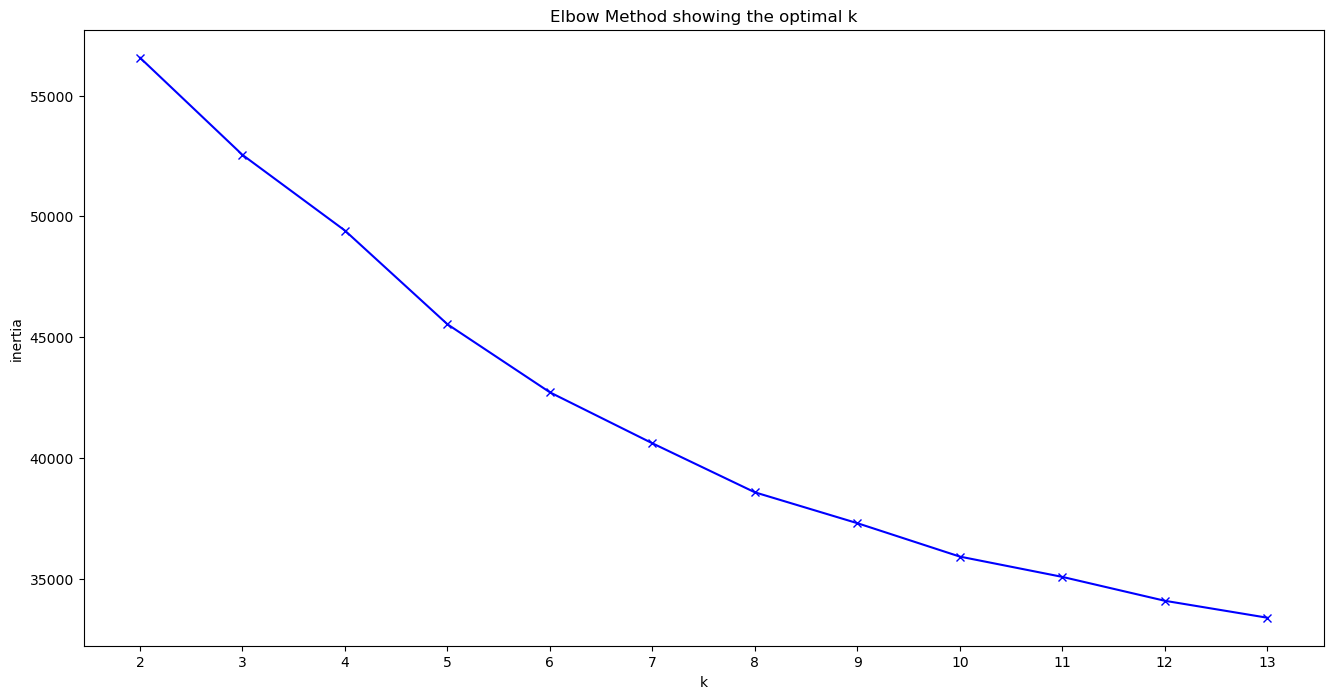

In [48]:
K = range(2, 14)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

- Difficult to see the elbow, but could be 6

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

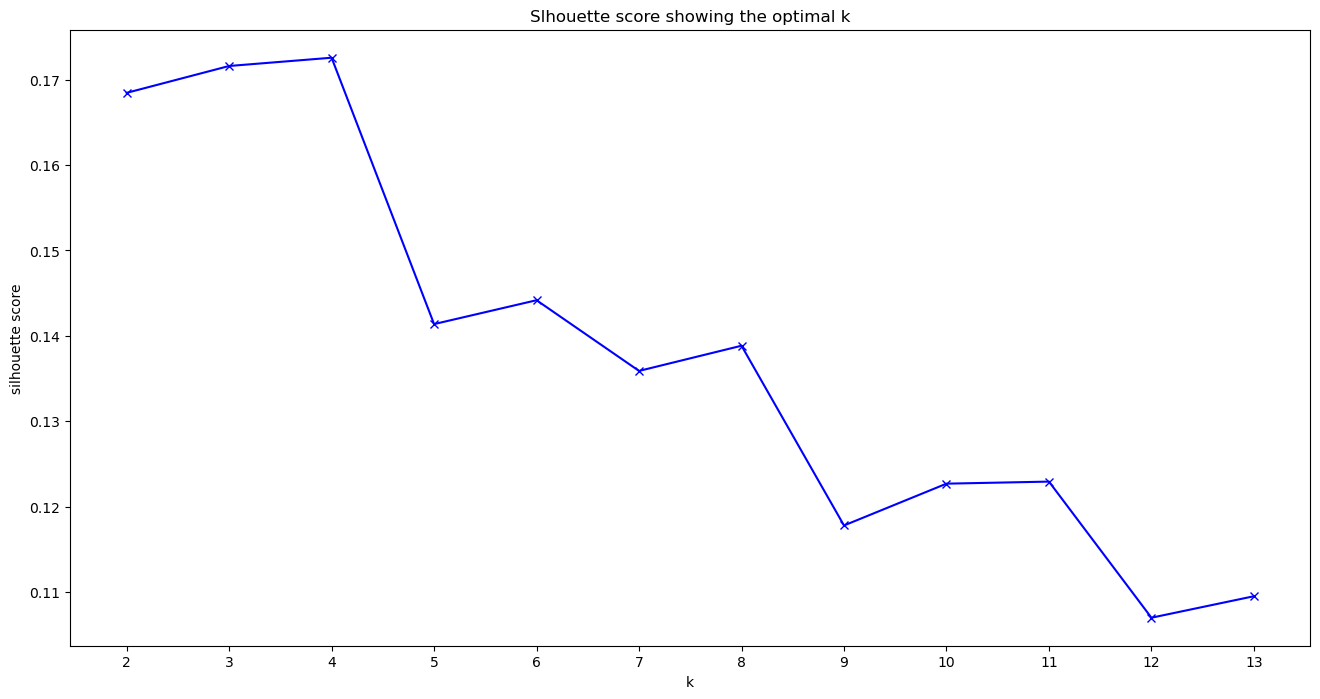

In [49]:
K = range(2, 14)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

- It is reaffirmed that 6 would be optimal, but we see 4 with the highest value, so in this case it would be the optimal choice.

## Checking KMeans with 4 and 6 clusters

#### Number of clusters = 4

In [50]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=4, random_state=1234)

In [51]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     271
1    2981
2    1588
3     263
dtype: int64

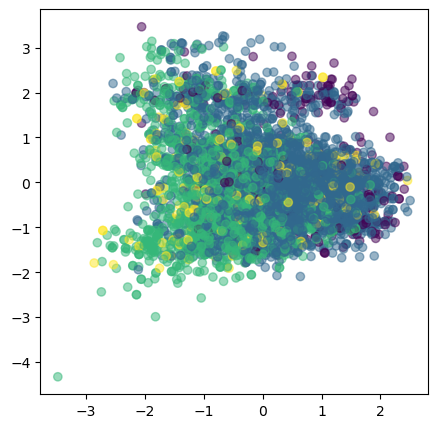

In [52]:
# Plotting (num clusters = 4)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 10], c=clusters,alpha=0.5)

plt.show()

#### Number of clusters = 6

In [87]:
import pickle
kmeans = KMeans(n_clusters=6, random_state=1234)
importkmeans=kmeans.fit(X_prep)
pickle.dump(importkmeans, open("kmeans.pkl", "wb"))

In [54]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2085
1     342
2    1219
3     223
4     995
5     239
dtype: int64

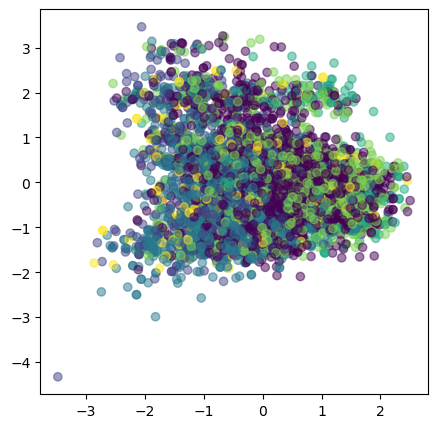

In [55]:
# Plotting (num clusters = 6)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 10], c=clusters,alpha=0.5)

plt.show()

- I will keep 6 clusters for my model

### Function to identify the cluster of the target song

In [89]:
# Function:

# First: 
## It takes numerical variables from spotify_data (corresponding to audio features
## Select all X (no target yet)
## Scale values of X
## K-Means generate 6 clusters/segments (k=6 from elbow and 2nd max of silouhette)
## and fit the model with X scaled (X_prep)

# Then:
## If song_searched IN Spotify_data --> retrieve audio features for that song
## Scalate new audio features
## Check against the previous KMeans fitted model
## Obtain segment/cluster of searched song

def get_song_cluster(song_searched, spotify_data):
    
    # Select X, but no target yet
    X = spotify_data

    # Scaling Data
    X_prep = StandardScaler().fit_transform(spotify_data)

    # KMeans (k = 6) to create 6 clusters/segments
    kmeans = KMeans(n_clusters=6, random_state=1234)
    kmeans.fit(X_prep)
    
    # Predicting / assigning the clusters:
    clusters = kmeans.predict(X_prep)
    
    # Converting both searched song and 'title' in spotify_data to lower case
    song_searched = song_searched.lower() 
    all_songs['title'] = all_songs['title'].str.lower()

    # Checking if the input song is in the Spotify data
    if song_searched in all_songs['title'].values:
        
        # Extracting the features for the input song 
        # (filtering through boolean mask and selecting first row of filtered)
        song_features = X_spotify.loc[all_songs['title']==song_searched].iloc[0]
        
        # Predicting the cluster:
        
        # Solving dimensional issue and need for array:   
        # Convert target_song to a numpy array and reshape to be a 2-dimensional array with one row
        song_features_arr = np.array(song_features).reshape(1, -1)
        
        # Scaling target_song values using the same X_prep scaler used for X data
        song_features_prep = StandardScaler().fit(X_prep).transform(song_features_arr)
        # Predicting / assigning the clusters using the same Kmeans fitted before:
        song_cluster = kmeans.predict(song_features_prep)
        
         # Recommending the most similar song from that cluster:
        
        # Selecting all songs from the same cluster as song_searched (song_cluster)
        songs_in_cluster = all_songs[kmeans.labels_ == song_cluster[0]]
        
                ## Note(I)
    
        # Comparing song_searched with songs in same cluster using cosine_similarity
        from sklearn.metrics.pairwise import cosine_similarity
        
                ## Note (II)
    
        # Calculating cosine similarity between searched song and songs in cluster
        similarities = cosine_similarity(song_features_prep, songs_in_cluster.select_dtypes(np.number))
    
        # Finding the most similar song in the cluster
        most_similar_song_idx = np.argmax(similarities)
        
                ## Note (III)
    
        # Retrieving the most similar song from the cluster
        most_similar_song = songs_in_cluster.iloc[most_similar_song_idx]['title']
    
    
        # Recommending another random song from that cluster:
        
        # Selecting a random song from that cluster
        random_song_idx = np.random.choice(np.where(kmeans.labels_ == song_cluster)[0])

        # Check random_song and most_similar_sonog are not the same. If so, repeat random choice.
        while all_songs.iloc[random_song_idx]['title'] == most_similar_song:
            random_song_idx = np.random.choice(np.where(kmeans.labels_ == song_cluster)[0])

        # Getting title of random song
        random_song = all_songs.iloc[random_song_idx]['title']

    
    
        display(Markdown(f"The song '**{song_searched.capitalize()}**' belongs to cluster '**{song_cluster[0]}**'.\n\n"
                  f"The most similar song in the cluster is '**{most_similar_song.capitalize()}**'.\n\n"
                  f"Here's a random song from the same cluster: '**{random_song.capitalize()}**'."))

                
    else:
    
        return f"The song '**{song_searched}**' is not in the Spotify data."

In [76]:
all_songs['title'][0:10]

0                                                diles
1    cayó la noche (feat. cruz cafuné, abhir hathi,...
2                                                limbo
3                                              lovumba
4                                       no sigue modas
5                                te pintaron pajaritos
6                             el abusador del abusador
7                                                remix
8                                               bombón
9                                                  hot
Name: title, dtype: object

In [77]:
from IPython.display import Markdown, display
# Input
song_searched = input("Introduce the name of a song: ")
# Applying function
get_song_cluster(song_searched, X_spotify)

Introduce the name of a song: bombon


"The song '**bombon**' is not in the Spotify data."